# 인공지능의 학습이 어떻게 이루어지는에 대한 코드
### 참고: https://m.blog.naver.com/formin/221991876292
## fit 함수 내에서 어떻게 학습이 이루어지는지
### 이해 필요 X

In [23]:
#덧셈을 해주는 클래스 생성
#덧셈에 대한 미분식 포함
class add_graph:
  def __init__(self):
    pass
  def forward(self, x, y):
    out = x + y
    return out
  def backward(self, dout):
    dx = 1 * dout
    dy = 1 * dout
    return dx, dy

In [24]:
#곱하기를 해주는 클래스 생성
#곱셈에 대한 미분식 포함
class mul_graph:
  def __init__(self):
    self.x = None
    self.y = None
  def forward(self, x, y):
    self.x = x
    self.y = y
    out = x * y
    return out
  def backward(self, dout):
    dx = self.y * dout
    dy = self.x * dout
    return dx, dy

In [67]:
#MSE 그래프
class mse_graph:
    def __init__(self):
        #loss=에러값
        self.loss = None
        #y=결과값
        self.y = None
        #t=target(정답값)
        self.t = None
        self.x = None

    def forward(self, y, t):
        self.t = t
        self.y = y
        self.loss = np.square(self.t - self.y).sum() / self.t.shape[0]
        return self.loss
    
    def backward(self, x, dout=1):
        data_size = self.t.shape[0]
        dweight_mse = (((self.y - self.t) * x).sum() * 2 / data_size)
        dbias_mse = (self.y - self.t).sum() * 2 / data_size
        return dweight_mse, dbias_mse

In [32]:
#사과, 오렌지, TAX 변수 지정
apple = 100
apple_num = 2

orange = 150
orange_num = 3

tax = 1.1

In [26]:
#각각에 알맞는 연산함수 지정
mul_apple_graph = mul_graph()

mul_orange_graph = mul_graph()

add_apple_orange_graph = add_graph()

mul_tax_graph = mul_graph()

In [33]:
#사과 가격
apple_price = mul_apple_graph.forward(
    apple, apple_num)

#오렌지 가격
orange_price = mul_orange_graph.forward(
    orange, orange_num)

#총 가격
all_price = add_apple_orange_graph.forward(
    apple_price, orange_price)

#TAX 포함 가격
total_price = mul_tax_graph.forward(
    all_price, tax)

print(total_price)

715.0000000000001


In [34]:
#모든 가격을 미분
#각각의 입력값이 출력에 얼마나 영향을 미치는지 알아보기 위함
dprice = 1

dall_price, dtax = mul_tax_graph.backward(dprice)

dapple_price, dorange_price = add_apple_orange_graph.backward(dall_price)

dorange, dorange_num = mul_orange_graph.backward(dorange_price)

dapple, dapple_num = mul_apple_graph.backward(dapple_price)

print('dApple', dapple)
print('dApple_num', dapple_num)
print('dOrange', dorange)
print('dOrange_num', dorange_num)

dApple 2.2
dApple_num 110.00000000000001
dOrange 3.3000000000000003
dOrange_num 165.0


In [44]:
import numpy as np


def celcius_to_fahrenheit(x):
    return x * 1.8 + 32

In [45]:
#곱셈 그래프와 덧셈 그래프 각각 생성
weight_graph = mul_graph()
bias_graph = add_graph()

In [47]:
#랜덤 값 생성
weight = np.random.uniform(0, 5, 1)
print(weight)

bias = 0
data_C = np.array(range(0,100))
data_F = celcius_to_fahrenheit(data_C)

scaled_data_C = data_C / 100
scaled_data_F = data_F / 100

print(scaled_data_C)
print(scaled_data_F)

[3.7561981]
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
[0.32  0.338 0.356 0.374 0.392 0.41  0.428 0.446 0.464 0.482 0.5   0.518
 0.536 0.554 0.572 0.59  0.608 0.626 0.644 0.662 0.68  0.698 0.716 0.734
 0.752 0.77  0.788 0.806 0.824 0.842 0.86  0.878 0.896 0.914 0.932 0.95
 0.968 0.986 1.004 1.022 1.04  1.058 1.076 1.094 1.112 1.13  1.148 1.166
 1.184 1.202 1.22  1.238 1.256 1.274 1.292 1.31  1.328 1.346 1.364 1.382
 1.4   1.418 1.436 1.454 1.472 1.49  1.508 1.526 1.544 1.562 1.58  1.598
 1.616 1.634 1.652 1.67  1.688 1.706 1.724

In [52]:
#예측값 출력
weighted_data = weight_graph.forward(
    weight, scaled_data_C)
predict_data = bias_graph.forward(weighted_data, bias)
print(predict_data)

[0.         0.03756198 0.07512396 0.11268594 0.15024792 0.18780991
 0.22537189 0.26293387 0.30049585 0.33805783 0.37561981 0.41318179
 0.45074377 0.48830575 0.52586773 0.56342972 0.6009917  0.63855368
 0.67611566 0.71367764 0.75123962 0.7888016  0.82636358 0.86392556
 0.90148754 0.93904953 0.97661151 1.01417349 1.05173547 1.08929745
 1.12685943 1.16442141 1.20198339 1.23954537 1.27710736 1.31466934
 1.35223132 1.3897933  1.42735528 1.46491726 1.50247924 1.54004122
 1.5776032  1.61516518 1.65272717 1.69028915 1.72785113 1.76541311
 1.80297509 1.84053707 1.87809905 1.91566103 1.95322301 1.99078499
 2.02834698 2.06590896 2.10347094 2.14103292 2.1785949  2.21615688
 2.25371886 2.29128084 2.32884282 2.36640481 2.40396679 2.44152877
 2.47909075 2.51665273 2.55421471 2.59177669 2.62933867 2.66690065
 2.70446263 2.74202462 2.7795866  2.81714858 2.85471056 2.89227254
 2.92983452 2.9673965  3.00495848 3.04252046 3.08008245 3.11764443
 3.15520641 3.19276839 3.23033037 3.26789235 3.30545433 3.3430

In [54]:
dout = 1
#뒤에서 부터 곱하기 때문에 backward 사용(chain rule)
dbias, dbiased_data = bias_graph.backward(dout)
dweight, dscaled_data_C = weight_graph.backward(dbiased_data)

print(dbias)
print(dweight)

1
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]


## MSE

In [68]:
#MSE : 오차를 제곱해서 더한 뒤 평균을 냄
#mse 미분값이 -값일 경우 weight 값을 더해주고 (오른쪽으로 이동)
#mse 미분값이 +값일 경우 weight 값을 빼준다. (왼쪽으로 이동)

mseGraph = mse_graph()
mse = mseGraph.forward(predict_data, scaled_data_F)

print(mse)

0.7391770044290084


In [70]:
weight_mse_gradient, bias_mse_gradient = mseGraph.backward(scaled_data_C)

print(weight_mse_gradient)
print(bias_mse_gradient)

0.9678352946741814
1.2966361226243939


In [72]:
#이동할 때 조금씩 움직여야하기 때문에 learning_rate가 필요
learning_rate = 0.1

#weight 값 확인
learned_weight = weight - learning_rate * weight_mse_gradient * np.average(dweight)
print('before learning weight : ', weight)
print('after learning weight : ', learned_weight)

#점점 멀어지는 이유는 bias 값 때문

before learning weight :  [3.7561981]
after learning weight :  [3.70829026]


In [73]:
#bias 값 확인
learned_bias = bias - learning_rate * bias_mse_gradient * dbias
print('before learning bias : ', bias)
print('after learning bias : ', learned_bias)

before learning bias :  0
after learning bias :  -0.1296636122624394


## 위에서 실행한 것 1000번 반복

In [78]:
error_list = []
weight_list = []
bias_list = []

for i in range(1000):
    #forward
    weighted_data = weight_graph.forward(weight, scaled_data_C)
    predict_data = bias_graph.forward(weighted_data, bias)

    #backward
    dout = 1
    dbias, dbiased_data = bias_graph.backward(dout)
    dweight, dscaled_data_C = weight_graph.backward(dbiased_data)

    #mse
    mse = mseGraph.forward(predict_data, scaled_data_F)

    error_list.append(mse)

    weight_mse_gradient, bias_mse_gradient = mseGraph.backward(scaled_data_C)

    weight_list.append(weight)
    weight = weight - learning_rate * weight_mse_gradient * np.average(dweight)
                                                                       
    bias_list.append(bias)
    bias = bias - learning_rate * bias_mse_gradient * dbias

weight_list.append(weight)
bias_list.append(bias)

print(weight)
print(bias)

[1.8]
0.31999999975702836


In [79]:
print(error_list[-1])

1.8988432912180242e-20


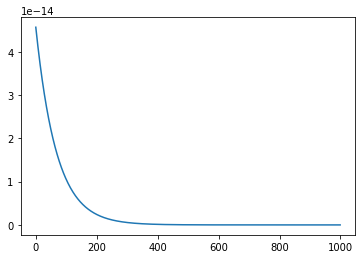

In [80]:
#그래프로 확인
import matplotlib.pyplot as plt

plt.plot(error_list)
plt.show()

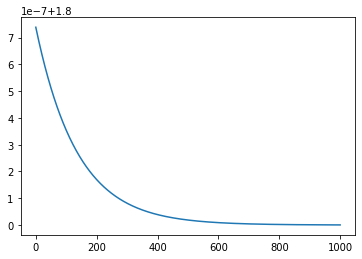

In [82]:
plt.plot(weight_list)
plt.show()

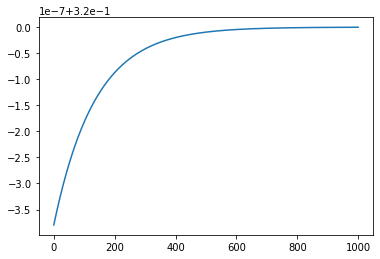

In [84]:
plt.plot(bias_list)
plt.show()